<a href="https://colab.research.google.com/github/rakshaarul/Amazon-Product-Network/blob/main/Amazon_product_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RATINGS

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


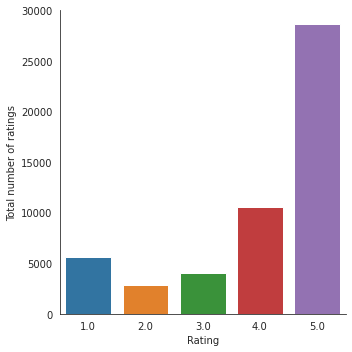

In [ ]:
import pandas
import seaborn as sns
e_data=pandas.read_csv("/ratings.csv",names=['userId', 'productId','Rating','timestamp'])
e_data.head()
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=e_data, aspect=1.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633942 sha256=52eb65851179b46a497500b75e777e5b30bff6a12f2fca8d22f49b56e0c6943b
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Collaberative filtering (Item-Item recommedation)

In [ ]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
import pandas
import seaborn as sns
e_data=pandas.read_csv("/content/ratings.csv",names=['userId', 'productId','Rating','timestamp'])
reader = Reader(rating_scale=(1, 5))
new_df=e_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)
data = Dataset.load_from_df(new_df[['userId', 'productId', 'Rating']],reader)
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)
test_pred = algo.test(testset)
test_pred

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[Prediction(uid='A162GJHVM6RYZG', iid='B00000J434', r_ui=1.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AVU1JHAKDGRH3', iid='B00000JBAT', r_ui=1.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A35F2E26CQK1IG', iid='B00004SB92', r_ui=1.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1DWHL46T99WP', iid='B00000J061', r_ui=2.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AMBVI2GL2GLXO', iid='B00004THCZ', r_ui=5.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2N3OSZPJ9CKU3', iid='B00001W0DI', r_ui=5.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3P3F9HVYH1HVE', iid='B00001WRSJ', r_ui=5.0, est=5, details={'was_impossible': True, 'reason': 'User and/or it

In [ ]:
!pip install numpy
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633980 sha256=a66b9e0c8e9d3ec5e33960d8fa37410a62d8979c2e14952934e981022d78cfeb
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


MODEL BASED COLLABORATIVE FILTERING

In [5]:
import pandas
import seaborn as sns
e_data=pandas.read_csv("/ratings.csv",names=['userId', 'productId','Rating','timestamp'])
new_df=e_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()


productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import numpy as np # linear algebra
ratings_matrix.shape
X = ratings_matrix.T
X.head()
X.shape
X1 = X
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape
X.index[75]
#Index of product ID purchased by customer
i = "B00000K135"
product_names = list(X.index)
product_ID = product_names.index(i)
product_ID
#Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

['1400532620',
 '7214047977',
 '9625993428',
 'B00000J08Q',
 'B00000J0D5',
 'B00000J1QK',
 'B00000J1SC',
 'B00000J1V3',
 'B00000JCT8',
 'B00000JHWX',
 'B00000JPPI',
 'B00000JSGF',
 'B00000JYWQ']

POPULARITY BASED RECOMMENDATION


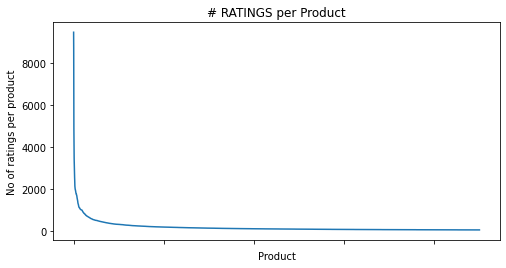

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
no_of_ratings_per_product = new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

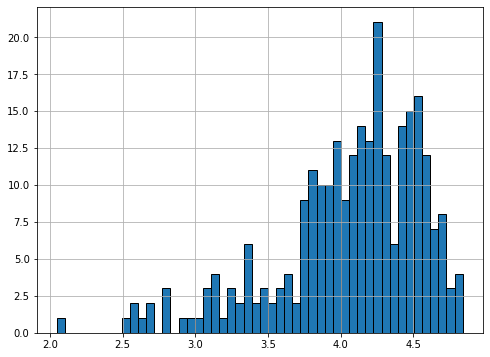

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True

ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

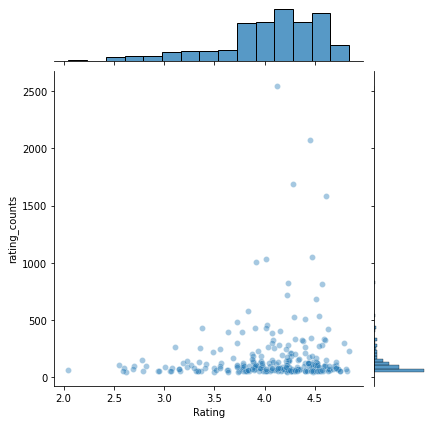

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

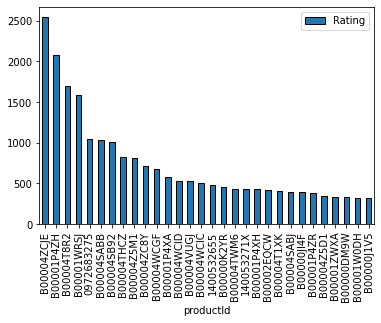

In [13]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")